# Практическая работа № 9
## Структуры данных библиотеки Pandas

Pandas - надстройка над библиотекой NumPy, обеспечивающая эффективныу реализацию класса DataFrame. Это многомерные массивы с метками для строк и столбцов, а также зачастую с неоднородными данными и/или пропусками в данных. Помимо интерфейса для хранения маркированных данных, эта библиотека реализует еще целый ряд полезных для работы с данными операций 

Если вы (как я) пользуетесь дистрибутивом Anaconda, Pandas у вас уже есть и готова к работе. Если вы из любителей напрягаться и все делать руками,

pip install pandas

вам в помощь.

In [1]:
import numpy as np
import pandas as pd

Существует 3 фундаментальных структуры данных библиотеки Pandas:
- Series
- DataFrame
- Index

### 1. Series

Объект Series - одномерный массив индексированных данных

In [53]:
data = pd.Series([0.25, 0.5, 0.75, 1])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

У него есть два атрибута: values и index

In [54]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [55]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [58]:
list(data.index)

[0, 1, 2, 3]

[0, 1, 2, 3]

In [61]:
list(data.items())

[(0, 0.25), (1, 0.5), (2, 0.75), (3, 1.0)]

Обращение по индексу работает, так же, как для списков или np-массивов

In [5]:
data[1]

0.5

In [6]:
data[1:3]

1    0.50
2    0.75
dtype: float64

В чем тогда отличие Series от одномерного массива NumPy? В индексе. Здась он *описывается явно* и связывается со значением. Это значит, что индекс необязательно должен быть целым числом. Или вообще числом.

In [7]:
data = pd.Series([0.25, 0.5, 0.75, 1], index = ['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [8]:
data['c']

0.75

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1], index = [2, 3, 2.5, 8 ])
data

2.0    0.25
3.0    0.50
2.5    0.75
8.0    1.00
dtype: float64

Больше похоже на словарь, правда?

In [62]:
list(data.keys())

[0, 1, 2, 3]

In [63]:
list(data.items())

[(0, 0.25), (1, 0.5), (2, 0.75), (3, 1.0)]

Словарь - структура, задающая соответствие произвольных ключей набору произвольных значений. Series - структура, задающая соответствие типизированных ключей набору типизированных значений.

Несоответствие типов не приведет к выбросу исключения, но сделает код менее эффективным (как думаете, почему?)

При том, что интерфейс Series похож на словарь, он предоставляет возможность выборки элементов при помощи тех же базовых механизмов, что и массивы Numpy 

In [10]:
import scipy
from scipy.io import loadmat
data_dict = loadmat('Log.mat') 

In [11]:
data_dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Nov 24 20:45:41 2022',
 '__version__': '1.0',
 '__globals__': [],
 'BaroAlt': array([[0.       ],
        [0.       ],
        [0.       ],
        ...,
        [3.9571733],
        [3.9571733],
        [3.9571733]], dtype=float32),
 'CoG': array([[0.  ],
        [0.  ],
        [0.  ],
        ...,
        [4.59],
        [4.59],
        [4.59]], dtype=float32),
 'LE': array([[0.     ],
        [0.     ],
        [0.     ],
        ...,
        [7.26173],
        [7.26173],
        [7.26173]], dtype=float32),
 'Lang': array([[   0.    ],
        [   0.    ],
        [   0.    ],
        ...,
        [3854.4995],
        [3854.4995],
        [3854.4995]], dtype=float32),
 'Lat': array([[   0.   ],
        [   0.   ],
        [   0.   ],
        ...,
        [4714.022],
        [4714.022],
        [4714.022]], dtype=float32),
 'MSL_A': array([[ 0. ],
        [ 0. ],
        [ 0. ],
        ...,
        [17.3],
    

In [12]:
data_series = pd.Series(data_dict)
data_series

__header__     b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Crea...
__version__                                                  1.0
__globals__                                                   []
BaroAlt        [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
CoG            [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
LE             [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Lang           [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Lat            [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
MSL_A          [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Pitch          [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Press          [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...
RE             [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Roll           [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
SoG            [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Throttle       [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
time           [[0.0], [0

In [13]:
data_series['BaroAlt']

array([[0.       ],
       [0.       ],
       [0.       ],
       ...,
       [3.9571733],
       [3.9571733],
       [3.9571733]], dtype=float32)

In [14]:
data_series[3]

array([[0.       ],
       [0.       ],
       [0.       ],
       ...,
       [3.9571733],
       [3.9571733],
       [3.9571733]], dtype=float32)

При этом, в отличие от словарей, pd.Series поддерживают срезы

In [15]:
data_series['LE':'RE']

LE       [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Lang     [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Lat      [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
MSL_A    [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Pitch    [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Press    [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...
RE       [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
dtype: object

In [16]:
data_series.index

Index(['__header__', '__version__', '__globals__', 'BaroAlt', 'CoG', 'LE',
       'Lang', 'Lat', 'MSL_A', 'Pitch', 'Press', 'RE', 'Roll', 'SoG',
       'Throttle', 'time'],
      dtype='object')

In [64]:
data_series[['LE','RE']]

LE    [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
RE    [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
dtype: object

Явная индексация - чрезвычайно гибкая вещь. По умолчанию это целочисленная последовательность. Если хотим чего-то другого, просто указываем индексы в явном виде.

In [17]:
pd.Series(5, index = [100,200,300])

100    5
200    5
300    5
dtype: int64

In [18]:
gps_data = pd.Series(data_dict, index = ['Lang', 'Lat', 'MSL_A'])
gps_data

Lang     [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Lat      [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
MSL_A    [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
dtype: object

#### Самостоятельно

- Создайте объект Series, который будет содержать данные только об атмосферном давлении и высоте полета
- Постройте графики этих двух величин, зная, что атмосферное давление должно быть в пределах 76 - 77.5 кПа. 


In [19]:
height_data = pd.Series(data_dict, index = ['BaroAlt', 'Press'])

(76000.0, 77500.0)

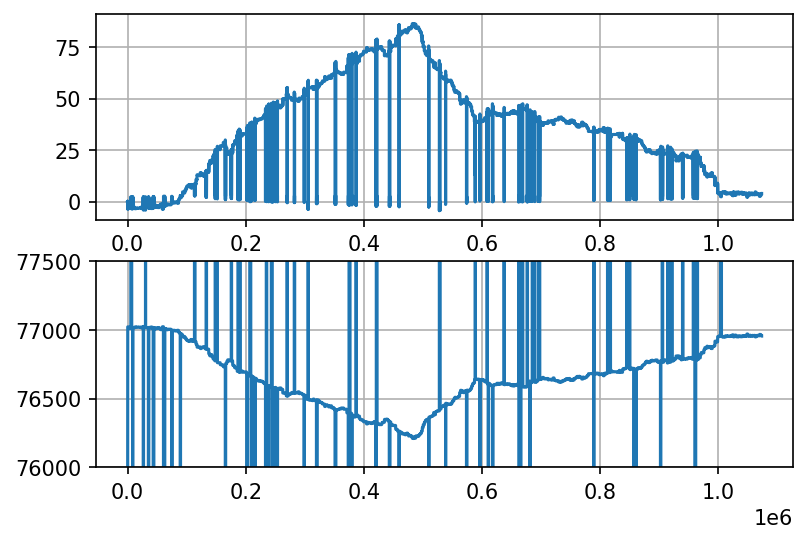

In [20]:
import matplotlib
from matplotlib import pyplot as plt
plt.figure(dpi=150)
plt.subplot(2,1,1)
plt.plot(height_data['BaroAlt'])
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(height_data['Press'])
plt.grid(True)
plt.ylim(76e3, 77.5e3)

## 2. DataFrame

Аналог двумерного массива с гибкими индексами строк и гибкими именами столбцов. Можно рассматривать как обобщенный массив NumPy, или как спецализированную версию словаря.

Фактически, это упорядоченная последовательность выровненных объектов Series ("выровненных" в том смысле, что у них один и тот же индекс)

In [21]:
data = [{'a':i, 'b': 2*i} for i in range(3)]
data

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]

In [22]:
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [23]:
pd.DataFrame([{'a':1, 'b':2},{'c':3, 'b':4}])

,a,b,c
0,1.0,2,NaN
1,NaN,4,3.0


In [24]:
pd.DataFrame(np.random.rand(3,2), columns = ['col_1', 'col_2'], index = ['a','b','c'])

,col_1,col_2
a,0.527797,0.158570
b,0.248443,0.672761
c,0.945588,0.631970


In [27]:
pd.DataFrame(gps_data)
#pd.DataFrame(gps_data, columns = ['Log data'])


,0
Lang,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
Lat,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
MSL_A,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."


Не совсем то, что нам нужно: весь диапазон значений параметра в такой форме воспринимется интерпритатором как 1 объект. Давайте сформируем полноценную таблицу, где имена столбцов будут соответствовать названиям параметров, а строки будут индексироваться временными метками.

In [68]:
#dataframe = pd.DataFrame(columns = data_series.index[3:14], index = data_series['time'][:,0])
dataframe = pd.DataFrame(columns = data_series.index[3:14], index = data_series['time'][:,0].round(1))

In [ ]:
data_dict['time'].shape

In [ ]:
data_series.index[3:14]

In [69]:
dataframe

,BaroAlt,CoG,LE,Lang,Lat,MSL_A,Pitch,Press,RE,Roll,SoG
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
214668.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214668.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214668.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214669.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
dataframe['BaroAlt'] = data_series['BaroAlt']
dataframe

,BaroAlt,CoG,LE,Lang,Lat,MSL_A,Pitch,Press,RE,Roll,SoG
0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.8,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
214668.4,3.957173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214668.6,3.957173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214668.8,3.957173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214669.0,3.957173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Заполнить самим
for key in data_series.index[3:14]:
    #print(key)
    dataframe[key] = data_series[key]

In [80]:
dataframe

,BaroAlt,CoG,LE,Lang,Lat,MSL_A,Pitch,Press,RE,Roll,SoG,"Press, Pa"
0.0,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000
0.2,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000
0.4,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000
0.6,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000
0.8,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
214668.4,3.957173,4.59,7.26173,3854.499512,4714.021973,17.299999,7.914008,76955,7.758317,4.610163,0.0,76.955
214668.6,3.957173,4.59,7.26173,3854.499512,4714.021973,17.299999,7.914008,76955,7.758317,4.610163,0.0,76.955
214668.8,3.957173,4.59,7.26173,3854.499512,4714.021973,17.299999,7.914008,76955,7.758317,4.610163,0.0,76.955
214669.0,3.957173,4.59,7.26173,3854.499512,4714.021973,17.299999,7.914008,76955,7.758317,4.610163,0.0,76.955


Индексаторы

loc
iloc

In [83]:
dataframe.loc[214668.6]

BaroAlt          3.957173
CoG              4.590000
LE               7.261730
Lang          3854.499512
Lat           4714.021973
MSL_A           17.299999
Pitch            7.914008
Press        76955.000000
RE               7.758317
Roll             4.610163
SoG              0.000000
Press, Pa       76.955000
Name: 214668.6, dtype: float64

In [82]:
dataframe.iloc[100000]

BaroAlt          6.376184
CoG            128.500000
LE               7.612786
Lang          3854.501709
Lat           4714.018066
MSL_A           12.200000
Pitch           15.861842
Press        76933.000000
RE               7.661412
Roll             0.731837
SoG              9.460000
Press, Pa       76.933000
Name: 20000.0, dtype: float64

In [ ]:
dataframe.drop('CoG', axis = 'columns')

In [ ]:
dataframe[0:10]

In [ ]:
dataframe.drop(0, axis = 'index')

In [ ]:
dataframe.drop(index = np.arange(0.0,10.0,0.2))

In [ ]:
dataframe.shape

In [76]:
dataframe['Press, Pa'] = dataframe['Press'] / 1e3

In [77]:
dataframe

,BaroAlt,CoG,LE,Lang,Lat,MSL_A,Pitch,Press,RE,Roll,SoG,"Press, Pa"
0.0,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000
0.2,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000
0.4,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000
0.6,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000
0.8,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
214668.4,3.957173,4.59,7.26173,3854.499512,4714.021973,17.299999,7.914008,76955,7.758317,4.610163,0.0,76.955
214668.6,3.957173,4.59,7.26173,3854.499512,4714.021973,17.299999,7.914008,76955,7.758317,4.610163,0.0,76.955
214668.8,3.957173,4.59,7.26173,3854.499512,4714.021973,17.299999,7.914008,76955,7.758317,4.610163,0.0,76.955
214669.0,3.957173,4.59,7.26173,3854.499512,4714.021973,17.299999,7.914008,76955,7.758317,4.610163,0.0,76.955


In [78]:
dataframe.describe()

,BaroAlt,CoG,LE,Lang,Lat,MSL_A,Pitch,Press,RE,Roll,SoG,"Press, Pa"
count,1.073347e+06,1.073347e+06,1.073347e+06,1.073347e+06,1.073347e+06,1.073347e+06,1.073347e+06,1.073347e+06,1.072680e+06,1.073347e+06,1.071699e+06,1.073347e+06
mean,3.418909e+01,inf,-3.090407e+25,NaN,2.197488e+08,3.279359e+01,8.963252e+68,1.474590e+07,NaN,2.595071e+40,-6.670438e+31,1.474590e+04
std,2.443696e+01,inf,inf,inf,7.694171e+08,1.878608e+01,1.547666e+71,3.254981e+08,inf,2.424053e+42,inf,3.254981e+05
min,-4.398597e+00,-2.897797e+00,-2.907151e+28,-1.555576e+38,-2.079942e+00,-2.881681e+00,-4.574219e+01,-2.117285e+09,-3.569926e+37,-4.613330e+01,-4.984605e+35,-2.117285e+06
25%,1.242616e+01,6.574000e+01,7.159248e+00,3.854499e+03,4.714009e+03,1.730000e+01,7.952008e+00,7.649800e+04,7.537115e+00,-5.399553e+00,6.840000e+00,7.649800e+01
50%,3.544810e+01,1.622700e+02,7.245830e+00,3.854508e+03,4.714017e+03,3.170000e+01,1.396760e+01,7.664700e+04,7.758421e+00,2.783454e+00,1.064000e+01,7.664700e+01
75%,4.990405e+01,2.436500e+02,7.401949e+00,3.854517e+03,4.714021e+03,4.550000e+01,2.002255e+01,7.683500e+04,7.802367e+00,9.943656e+00,1.335000e+01,7.683500e+01
max,8.639694e+01,3.460621e+37,2.923433e+09,1.446200e+38,2.931833e+09,7.670000e+01,2.672437e+73,2.074862e+09,2.187529e+38,2.264563e+44,1.364832e+35,2.074862e+06


In [79]:
dataframe.T

,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,...,214667.4,214667.6,214667.8,214668.0,214668.2,214668.4,214668.6,214668.8,214669.0,214669.2
BaroAlt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.957173,3.957173,3.957173,3.957173,3.957173,3.957173,3.957173,3.957173,3.957173,3.957173
CoG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.590000,4.590000,4.590000,4.590000,4.590000,4.590000,4.590000,4.590000,4.590000,4.590000
LE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.261730,7.261730,7.261730,7.261730,7.261730,7.261730,7.261730,7.261730,7.261730,7.261730
Lang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3854.499512,3854.499512,3854.499512,3854.499512,3854.499512,3854.499512,3854.499512,3854.499512,3854.499512,3854.499512
Lat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4714.021973,4714.021973,4714.021973,4714.021973,4714.021973,4714.021973,4714.021973,4714.021973,4714.021973,4714.021973
MSL_A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.299999,17.299999,17.299999,17.299999,17.299999,17.299999,17.299999,17.299999,17.299999,17.299999
Pitch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.914008,7.914008,7.914008,7.914008,7.914008,7.914008,7.914008,7.914008,7.914008,7.914008
Press,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,76955.000000,76955.000000,76955.000000,76955.000000,76955.000000,76955.000000,76955.000000,76955.000000,76955.000000,76955.000000
RE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.758317,7.758317,7.758317,7.758317,7.758317,7.758317,7.758317,7.758317,7.758317,7.758317
Roll,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.610163,4.610163,4.610163,4.610163,4.610163,4.610163,4.610163,4.610163,4.610163,4.610163


### 3. Index

Объект Index в Pandas обеспечивает возможность в явном виде ссылаться на данные и модифицировать их. Его можно рассматривать или как неизменяемый массив, или как упорядоченное множество, из чего следуют некоторые любопытные возможности операций над ним.

In [40]:
ind = pd.Index([2,3,5,7,11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [41]:
ind[1]

3

In [42]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [43]:
ind[1]=0

TypeError: Index does not support mutable operations

Объекты Pandas проектировались с прицелом на упрощение таких операций, как соединение наборов данных, зависящее от многих аспектов метрики множеств. Index поддерживает большинство операций, свойственных для типа set

In [46]:
indA = pd.Index([1,3,5,7,9])
indB = pd.Index([2,3,5,7,11])

In [45]:
indA & indB

C:\Users\Catring\AppData\Local\Temp\ipykernel_15348\144964795.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  indA & indB


Int64Index([3, 5, 7], dtype='int64')

In [48]:
indA.intersection(indB)

Int64Index([3, 5, 7], dtype='int64')

In [47]:
indA | indB

C:\Users\Catring\AppData\Local\Temp\ipykernel_15348\3251124211.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  indA | indB


Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [49]:
indA.union(indB)

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [50]:
indA ^ indB #симмтричная разность

C:\Users\Catring\AppData\Local\Temp\ipykernel_15348\4257225582.py:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  indA ^ indB #симмтричная разность


Int64Index([1, 2, 9, 11], dtype='int64')

In [51]:
indA.symmetric_difference(indB)

Int64Index([1, 2, 9, 11], dtype='int64')

### Самостоятельно

Создайте DataFrame, который будет содержать автора, название и жанр нескольких ваших любимых книг.


## Выводы